In [6]:
# Part A: Exploratory Data Analysis (EDA)
 
 
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\air-quality-index-regression-analysis\Air_quality\city_day.csv")
df.head()



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()  #  Display basic structure of the dataset including
            # number of rows, columns, data types, and non-null values

df.describe() 
df.isnull().sum() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:

df = df.dropna(subset=['AQI'])
df.isnull().sum()  # Remove rows where AQI is missing (since it is our target)
df = df.drop(columns=['Xylene'], errors='ignore')# Xylene have almost 60% missing values so remove this.
df.fillna(df.mean(numeric_only=True), inplace=True) #Fill remaining missing values with mean
df.isnull().sum() 
df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24850 non-null  float64
 3   PM10        24850 non-null  float64
 4   NO          24850 non-null  float64
 5   NO2         24850 non-null  float64
 6   NOx         24850 non-null  float64
 7   NH3         24850 non-null  float64
 8   CO          24850 non-null  float64
 9   SO2         24850 non-null  float64
 10  O3          24850 non-null  float64
 11  Benzene     24850 non-null  float64
 12  Toluene     24850 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(12), object(3)
memory usage: 3.0+ MB


In [10]:
df.describe() # compute summry Statistics


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,166.463581
std,62.208948,75.660357,22.245859,24.432532,29.542967,22.213762,7.011570,17.215217,21.368849,14.851646,18.269981,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,118.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.397500,3.458668,9.525714,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

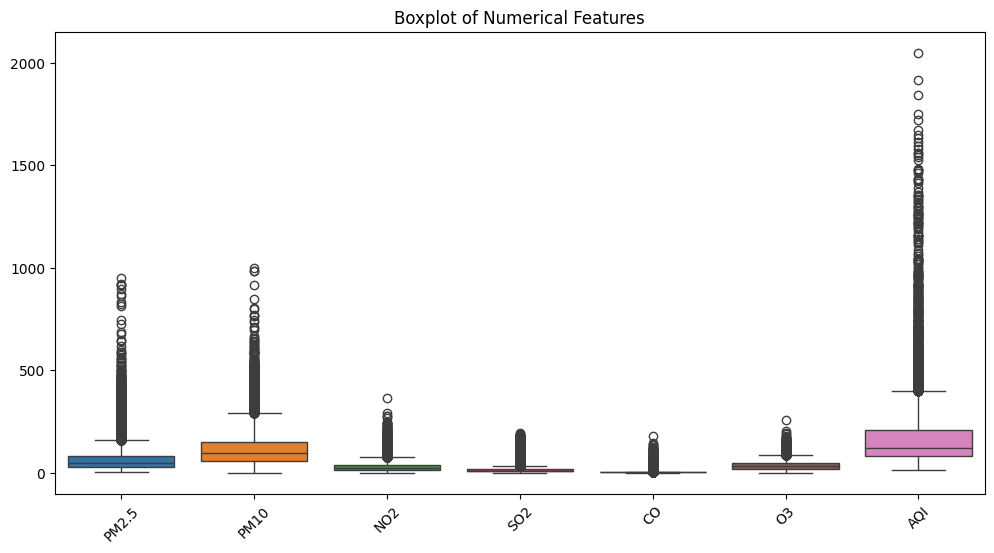

In [8]:

df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45) 
plt.title("Boxplot of Numerical Features")
plt.show()


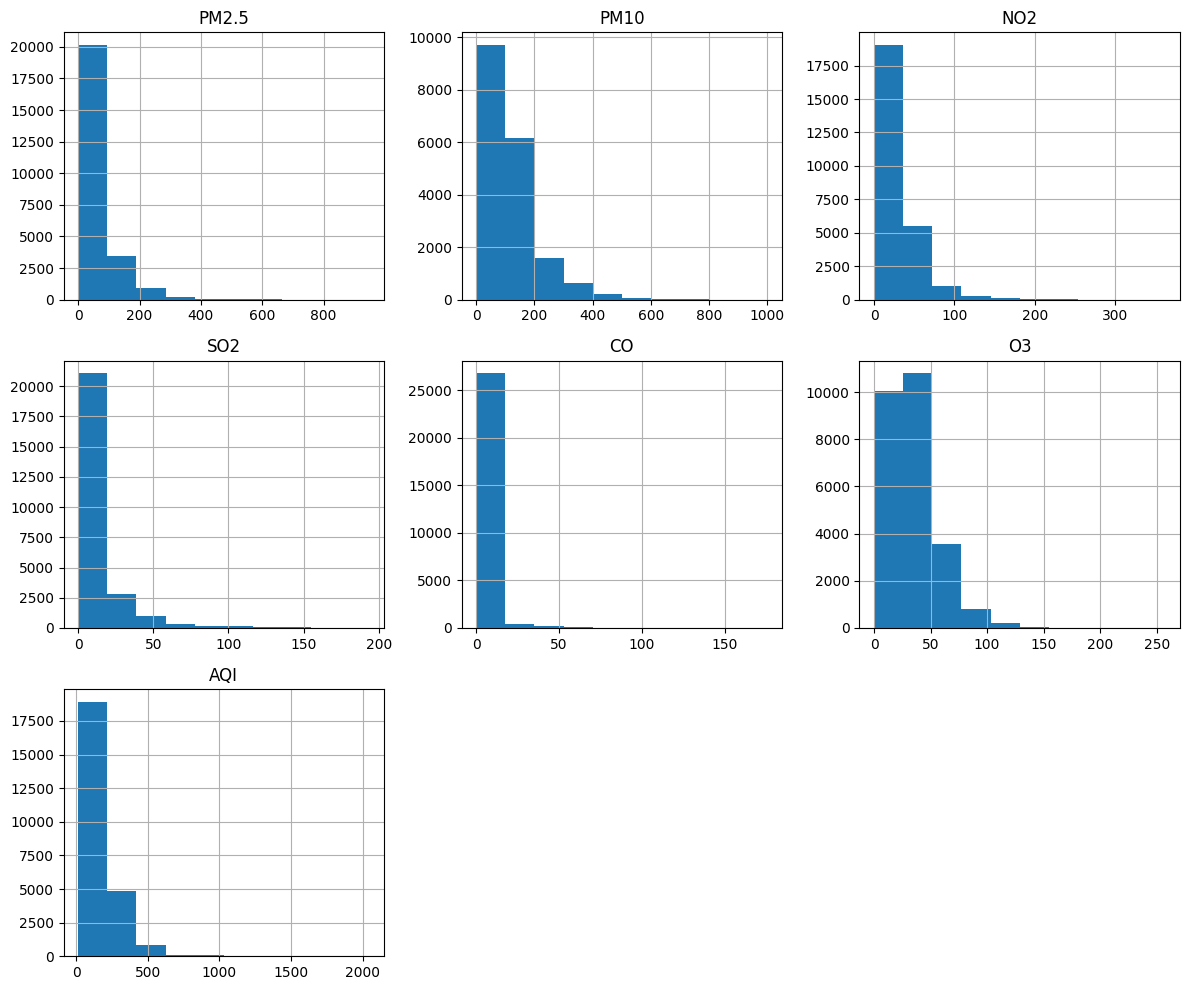

In [9]:
# Plot Feature Distributions
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

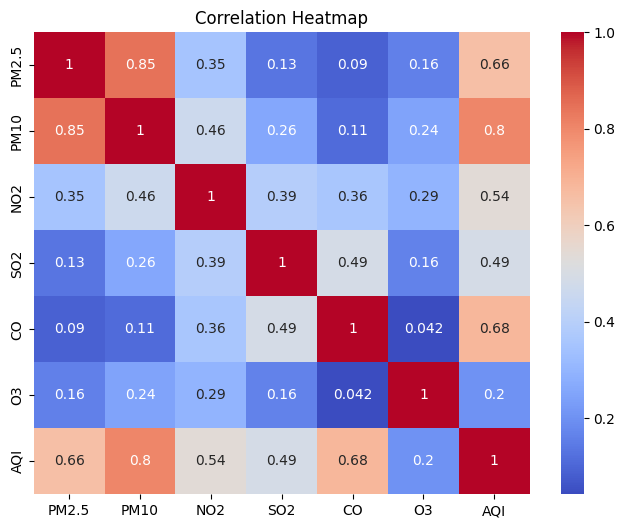

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Part B multiple linear regression 



features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
target = 'AQI'
df_clean = df[features + [target]].dropna()

X = df_clean[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].values
y = df_clean['AQI'].values


# Add column of 1s for intercept
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

# now find beta matrix
X_transpose = X.T
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

print("Intercept (b0):", beta[0])

for i, col in enumerate(features):
    print(f"Coefficient for {col}:", beta[i+1])




Intercept (b0): 9.946870880771899
Coefficient for PM2.5: 0.7172911666887081
Coefficient for PM10: 0.48643474400257547
Coefficient for NO2: 0.08178821578517566
Coefficient for SO2: 0.442217638980259
Coefficient for CO: 12.282423446856003
Coefficient for O3: 0.2096504901206786




Multiple Linear Regression Equation

The relationship between AQI and the chosen pollutants (PM2.5, PM10, NO2, SO2, CO, O3) can be expressed by the following multiple linear regression equation:

[AQI = 9.95 + 0.72*PM2.5 + 0.49 * PM10 + 0.08 * NO2 + 0.44 * SO2 + 12.28 * CO + 0.21 * O3]


* Among the features, CO has the largest impact on AQI, as its coefficient (12.28) is the largest.
* PM2.5 and PM10 also contribute positively to AQI.

This model explains how each pollutant influences the AQI, providing a clear linear relationship.



R² Score: 0.8944291256989431


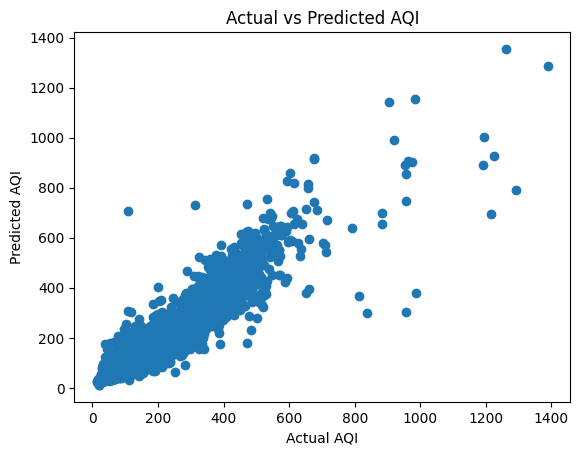

In [ ]:
# Step 5: Predict AQI
y_pred = X.dot(beta)

# Step 6: Calculate R² Score
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)

r2 = 1 - (ss_residual / ss_total)

print("\nR² Score:", r2)


# Step 7: Plot Actual vs Predicted AQI
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

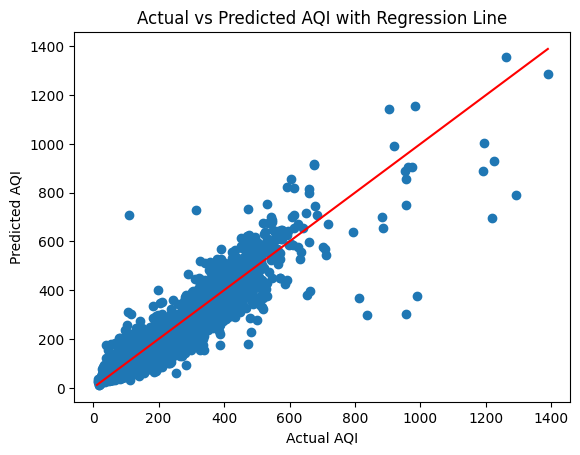

In [ ]:
# Step 7: Plot Actual vs Predicted AQI (with regression line)
plt.figure()

# Scatter plot
plt.scatter(y, y_pred)

# Regression reference line (Ideal line: y = x)
min_val = min(min(y), min(y_pred))
max_val = max(max(y), max(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], color = 'red')

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI with Regression Line")

plt.show()